# Module Imports and Classes

In [22]:
import matplotlib.pyplot as plt   #Used to plot images
import matplotlib.image as mpimg  #Used to read images from file
import numpy as np                #Used to store data in multi-dimensional arrays
import math                       #math functions
import random                     #used for probability predicates
%matplotlib inline                

class TrainingExample:
    def __init__(self, pixels, classification, location):
        self.pixels = pixels
        self.classification = classification
        self.location = location
        
class Node():
    def __init__(self,parent,positiveChild,negativeChild,childType,attribute,index,trainingExamples):
        self.parent = parent
        self.positiveChild = positiveChild
        self.negativeChild = negativeChild
        self.childType = childType
        if parent != None:
            self.depth = parent.depth + 1
        else:
            self.depth = 0
        self.attribute = attribute #can be coordinates of image[x,y] or label 0,1
        self.index = index
        self.trainingExamples = trainingExamples
    
    def Print(self):
        print(self.depth,self.index,self.childType,self.attribute,len(self.trainingExamples))


# Graphics

In [23]:
def PlotArrayOfImages(array):
    for j in range(0,len(array)):
        plt.figure(j,figsize=(10.5,16.5))
        plt.axis('off')
        plt.imshow(array[j])
        
def PlotArrayOfImagesHorizontally(array):
    plt.figure(figsize=(20,10))
    for i in range(0,len(array)):
        plt.subplot(1,len(array),i+1)
        plt.axis('off')
        plt.imshow(array[i])
        
def PlotHistogram(histogram):
    plt.bar(range(len(histogram)), histogram)
    
def TrainingExampleToImage(trainingExample):
    pixels = trainingExample.pixels
    classification = trainingExample.classification
    dimensions = pixels.shape
    image = np.empty((dimensions[0],dimensions[1],3), dtype=float)
    for i in range(0,dimensions[0]):
        for j in range(0,dimensions[1]):
            if classification == 0:
                if pixels[i][j] == 0:
                    image[i][j][0] = 0
                    image[i][j][1] = 0
                    image[i][j][2] = 1
                else:
                    image[i][j][0] = 1
                    image[i][j][1] = 1
                    image[i][j][2] = 1
            else: 
                if pixels[i][j] == 0:
                    image[i][j][0] = 1
                    image[i][j][1] = 1
                    image[i][j][2] = 0
                else:
                    image[i][j][0] = 1
                    image[i][j][1] = 1
                    image[i][j][2] = 1
    return image   

def PlotTrainingExamples(trainingExamples):
    length = len(trainingExamples)
    sideLength = math.ceil(math.sqrt(length))
    plt.figure(figsize=(40,20))
    f, axarr = plt.subplots(sideLength, sideLength)
    for x in range(0,sideLength):
        for y in range(0,sideLength):
            axarr[x,y].axis('off')
            if (x*sideLength)+y < length:
                axarr[x,y].imshow(TrainingExampleToImage(trainingExamples[(x*sideLength)+y]))
                #axarr[x,y].grid(color='b', linestyle='-')
    
def DrawTree(tree):

    deepestDepth = 0
    for i in range(0,len(tree)):
        if tree[i].depth > deepestDepth:
            deepestDepth = tree[i].depth

    nodes = np.empty((deepestDepth+1,2**deepestDepth),dtype=object)
    x = np.empty((deepestDepth+1,2**deepestDepth))
    dimensions = x.shape
    plt.figure(figsize=((2**deepestDepth)+4,2*deepestDepth))

    
    for k in range(0, len(tree)):
        nodes[tree[k].depth][tree[k].index] = tree[k]
        #nodes[tree[k].depth].append(tree[k])
    
    for o in range(deepestDepth,-1,-1):
        for p in range(0,2**o):
            if o == deepestDepth:
                x[o][p] = (p+1) / ((2**deepestDepth)+1)
            else:
                x[o][p] = (x[o+1][2*p]+x[o+1][(2*p)+1])/2
    
    for d in range(deepestDepth,-1,-1):
        for n in range(0,2**d):
            if(nodes[d][n] != None):
                if d != deepestDepth and nodes[d][n].positiveChild != None and nodes[d][n].negativeChild != None:
                    plt.plot([x[d][n],x[d+1][2*n]],[1-(0.1*d)-0.01,1-(0.1*(d+1))+0.032],c='green',linewidth=3)
                    plt.plot([x[d][n],x[d+1][(2*n)+1]],[1-(0.1*d)-0.01,1-(0.1*(d+1))+0.032],c='red',linewidth=3)

                if isinstance(nodes[d][n].attribute,np.ndarray):
                    label = str(nodes[d][n].attribute)
                    dataLength = str(len(nodes[d][n].trainingExamples))
                    if nodes[d][n].childType == 0:
                        plt.text(x[d][n], 1-(0.1*d), label,bbox={'facecolor':'white', 'alpha':0.5, 'pad':5})
                        plt.text(x[d][n], 1-(0.1*d)+0.02, dataLength)    
                    else:
                        plt.text(x[d][n], 1-(0.1*d), label,bbox={'facecolor':'white', 'alpha':0.5, 'pad':5})
                        plt.text(x[d][n], 1-(0.1*d)+0.02, dataLength)
                else:
                    positiveExamples = 0
                    negativeExamples = 0
                    for t in range(0,len(nodes[d][n].trainingExamples)):
                        if nodes[d][n].trainingExamples[t].classification == 0:
                            negativeExamples += 1
                        else:
                            positiveExamples += 1
                            
                    dataLength = str(len(nodes[d][n].trainingExamples))
                    plt.text(x[d][n], 1-(0.1*d)+0.02, dataLength)
                    if positiveExamples > negativeExamples:
                        label = str(round(round(positiveExamples/(positiveExamples+negativeExamples)*100))) + '%'
                        if label == '100%':
                            if (positiveExamples/(positiveExamples+negativeExamples)) != 1.0:
                                label = '99%'
                        plt.text(x[d][n], 1-(0.1*d), label,bbox={'facecolor':'yellow', 'alpha':0.5, 'pad':5})
                    else:
                        label = str(round(round(negativeExamples/(positiveExamples+negativeExamples)*100))) + '%'
                        if label == '100%':
                            if (negativeExamples/(positiveExamples+negativeExamples)) != 1.0:
                                label = '99%'
                        plt.text(x[d][n], 1-(0.1*d), label,bbox={'facecolor':'cyan', 'alpha':0.5, 'pad':5})
            
    plt.axis('off')
    fig = plt.gcf()
    DPI = fig.get_dpi()
    fig.set_size_inches(65535.0/float(DPI),1220.0/float(DPI))

# Image Transformation

In [24]:
def RedToGreyScale(img):
    dimensions = img.shape
    newImg = np.copy(img)
    for i in range(0,dimensions[0]):
        for j in range(0,dimensions[1]):
            newImg[i][j][1] = img[i][j][0]
            newImg[i][j][2] = img[i][j][0]
    return newImg

def GreenToGreyScale(img):
    dimensions = img.shape
    newImg = np.copy(img)
    for i in range(0,dimensions[0]):
        for j in range(0,dimensions[1]):
            newImg[i][j][0] = img[i][j][1]
            newImg[i][j][2] = img[i][j][1]
    return newImg

def BlueToGreyScale(img):
    dimensions = img.shape
    newImg = np.copy(img)
    for i in range(0,dimensions[0]):
        for j in range(0,dimensions[1]):
            newImg[i][j][0] = img[i][j][2]
            newImg[i][j][1] = img[i][j][2]
    return newImg

def CreateHistogram(img):
    histogram = [0] * 256
    dimensions = img.shape
    for i in range(0,dimensions[0]):
        for j in range(0,dimensions[1]):
            histogram[int(img[i][j][1]*255)] += 1
    return histogram

def Otsu(img):
    histogram = CreateHistogram(img)
    threshold = 0
    maxBetweenClassVariance = 0
    for i in range(1,255):
        weightBackground = 0
        weightForeground = 0
        meanBackground = 0
        meanForeground = 0
        pixelCount = 0
        for j in range(1,255):
            if j < i:
                weightBackground += histogram[j]
                meanBackground += j*histogram[j]
            else:
                weightForeground += histogram[j]
                meanForeground += j*histogram[j]
            pixelCount += histogram[j]
        if weightBackground != 0 and weightForeground != 0:
            meanBackground /= weightBackground
            meanForeground /= weightForeground
            weightBackground /= pixelCount
            weightForeground /= pixelCount
        betweenClassVariance = weightBackground*weightForeground*((meanBackground-meanForeground)**2)
        if betweenClassVariance > maxBetweenClassVariance:
            maxBetweenClassVariance = betweenClassVariance
            threshold = i
    return threshold

def ThresholdImage(img, constant):
    threshold = Otsu(img)
    dimensions = img.shape
    newImg = np.copy(img)
    newImg = newImg.astype(float)
    for i in range(0,dimensions[0]):
        for j in range(0,dimensions[1]):
            if img[i][j][0] >= (threshold + constant)/ 255:
                newImg[i][j][0] = 1
                newImg[i][j][1] = 1
                newImg[i][j][2] = 1
            else:
                newImg[i][j][0] = 0
                newImg[i][j][1] = 0
                newImg[i][j][2] = 0
    return newImg

# Training Examples and ID3

In [25]:
def CoordinatesToIndex(trainingExamples, coordinates):
    for i in range(0,len(trainingExamples)):
        if trainingExamples[i].location[0] == coordinates[1] and trainingExamples[i].location[1] == coordinates[0]:
            return i
        
def CalculateAveragePixelsPerEye(classificationImage, numberOfEyes, width, height):
    eyePixels = 0
    for x in range(0,width):
        for y in range(0,height):
            if classificationImage[x][y][0] == 1:
                eyePixels += 1
    averagePixelsPerEye = eyePixels / numberOfEyes
    return averagePixelsPerEye

def ConstructExamples(binaryImage,classificationImage,diameter):
    radius = math.floor(diameter / 2)
    dimensions = binaryImage.shape
    #positiveExamples = []
    #negativeExamples = []
    trainingExamples = []
    for x in range(radius,dimensions[0]-radius-1):
        for y in range(radius, dimensions[1]-radius-1):
            pixels = np.empty((diameter,diameter),dtype=int)
            classification = int(classificationImage[x][y][0])
            for i in range(-1*radius,radius+1): #y
                for j in range(-1*radius,radius+1): #x
                    pixels[j+radius][i+radius] = int(binaryImage[x+j][y+i][0])
            trainingExamples.append(TrainingExample(pixels,classification,[x,y]))
    return trainingExamples

def BalanceClasses(trainingExamples,majorityToMinorityRatio): 
    negatives = 0
    positives = 0
    attempts = 0
    successes = 0
    balancedClassExamples = []
    for i in range(0,len(trainingExamples)):
        if trainingExamples[i].classification == 0:
            negatives += 1
        else:
            positives += 1
    for j in range(0,len(trainingExamples)):
        if positives > negatives:
            if trainingExamples[j].classification == 0:
                balancedClassExamples.append(trainingExamples[j])
            else:
                if random.uniform(0.0,1.0) < majorityToMinorityRatio * negatives / positives:
                    balancedClassExamples.append(trainingExamples[j])
        elif positives < negatives: 
            attempts += 1
            if trainingExamples[j].classification == 0:
                if random.uniform(0.0,1.0) < majorityToMinorityRatio * positives / negatives:
                    balancedClassExamples.append(trainingExamples[j])
            else:
                successes += 1
                balancedClassExamples.append(trainingExamples[j])
        else:
            balancedClassExamples.append(trainingExamples[j])
    return balancedClassExamples

def ID3(trainingExamples,variancePercentage):
    decisionTree = [None]
    attributesAlreadySelected = np.zeros(trainingExamples[0].pixels.shape)
    
    #create root node
    decisionTree[0] = Node(None,None,None,None,None,0,trainingExamples)
    SplitNode(decisionTree[0],attributesAlreadySelected)
    if isinstance(decisionTree[0].attribute,list):
        attributesAlreadySelected[decisionTree[0].attribute[0]][decisionTree[0].attribute[1]] = 1
    decisionTree.append(decisionTree[0].positiveChild)
    decisionTree.append(decisionTree[0].negativeChild)
    
    numberOfUnsplitNodes = -1
    foundMajorityPositiveNode = False
    allNodesSplitToVariancePercentage = False
    while not(allNodesSplitToVariancePercentage): #decisionTree[len(decisionTree)-1].depth != 6: #len(decisionTree) < 16: #numberOfUnsplitNodes != 0: #not(foundMajorityPositiveNode): 
        numberOfUnsplitNodes = 0
        allNodesSplitToVariancePercentage = True
        for i in range(1,len(decisionTree)):
            if decisionTree[i].attribute is None: #(bottom of branches)
                numberOfUnsplitNodes += 1
                '''if Entropy(decisionTree[i].trainingExamples) == 0:
                    print('entropy of nodes trainingExamples is 0')
                    if decisionTree[i].trainingExamples[0].classification == 0:
                        decisionTree[i].attribute = 0
                    else:
                        decisionTree[i].attribute = 1'''
                if Entropy(decisionTree[i].trainingExamples) > PercentToEntropy(variancePercentage):
                    SplitNode(decisionTree[i],attributesAlreadySelected)
                    #print(decisionTree[i].positiveChild != None, decisionTree[i].negativeChild != None)
                    
                    if isinstance(decisionTree[0].attribute,list):
                        attributesAlreadySelected[decisionTree[i].attribute[0]][decisionTree[i].attribute[1]] = 1
                        
                    if decisionTree[i].positiveChild != None:
                        decisionTree.append(decisionTree[i].positiveChild)
                        
                        positiveExamples = 0
                        negativeExamples = 0
                        for g in range(0,len(decisionTree[i].positiveChild.trainingExamples)):
                            if decisionTree[i].positiveChild.trainingExamples[g].classification == 0:
                                negativeExamples += 1
                            else:
                                positiveExamples += 1
                        
                        if (positiveExamples/(positiveExamples+negativeExamples)) > 0.5:
                            foundMajorityPositiveNode = True
                            
                        if PercentToEntropy(positiveExamples/(positiveExamples+negativeExamples)) > PercentToEntropy(variancePercentage):
                            allNodesSplitToVariancePercentage = False
                            #break
                    
                    if decisionTree[i].negativeChild != None:
                        decisionTree.append(decisionTree[i].negativeChild)
                        
                        positiveExamples = 0
                        negativeExamples = 0
                        for h in range(0,len(decisionTree[i].negativeChild.trainingExamples)):
                            if decisionTree[i].negativeChild.trainingExamples[h].classification == 0:
                                negativeExamples += 1
                            else:
                                positiveExamples += 1
                        if (positiveExamples/(positiveExamples+negativeExamples)) > 0.5:
                            foundMajorityPositiveNode = True    
                            
                        if PercentToEntropy(positiveExamples/(positiveExamples+negativeExamples)) > PercentToEntropy(variancePercentage):
                            allNodesSplitToVariancePercentage = False
                    
    
    for p in range(0,len(decisionTree)):
        if decisionTree[p].attribute is None:
            positiveExamples = 0
            negativeExamples = 0
            for b in range(0,len(decisionTree[p].trainingExamples)):
                if decisionTree[p].trainingExamples[b].classification == 0:
                    negativeExamples += 1
                else:
                    positiveExamples += 1
            if negativeExamples >= positiveExamples:
                decisionTree[p].attribute = 0
            else:
                decisionTree[p].attribute = 1
    
    return decisionTree
            
def SplitNode(node,attributesAlreadySelected):
        
    attributeDimensions = node.trainingExamples[0].pixels.shape
    informationGains = np.empty(attributeDimensions)
    maxInformationGain = 0
    splittingAttribute = None
            
    for i in range(0,attributeDimensions[0]):
        for j in range(0,attributeDimensions[1]):
            if attributesAlreadySelected[i][j] == 0:
                positiveSubset = []
                negativeSubset = []
                for k in range(0,len(node.trainingExamples)):
                    if node.trainingExamples[k].pixels[i][j] == 0:
                        negativeSubset.append(node.trainingExamples[k])
                    else:
                        positiveSubset.append(node.trainingExamples[k])
                informationGains[i][j] = InformationGain(positiveSubset,negativeSubset)
                if informationGains[i][j] >= maxInformationGain:
                    maxInformationGain = informationGains[i][j]
                    splittingAttribute = np.array((i,j))     
                    
    node.attribute = splittingAttribute
    positiveSubset = []
    negativeSubset = []
    
    for l in range(0,len(node.trainingExamples)):
        if node.trainingExamples[l].pixels[splittingAttribute[0]][splittingAttribute[1]] == 0:
            negativeSubset.append(node.trainingExamples[l])
        else:
            positiveSubset.append(node.trainingExamples[l])
            
    if len(positiveSubset) == 0 or len(negativeSubset) == 0:
        examplesPositive = 0
        examplesNegative = 0
        if len(positiveSubset) == 0:
            for m in range(0,len(negativeSubset)):
                if negativeSubset[m].classification == 0:
                    examplesNegative += 1
                else:
                    examplesPositive += 1
        else:
            for n in range(0,len(positiveSubset)):
                if positiveSubset[n].classification == 0:
                    examplesNegative += 1
                else:
                    examplesPositive += 1
        if examplesNegative > examplesPositive:
            node.attribute = 0
        else:
            node.attribute = 1
    else:
        node.positiveChild = Node(node,None,None,1,None,node.index*2,positiveSubset)
        node.negativeChild = Node(node,None,None,0,None,(node.index*2)+1,negativeSubset) 
        #print(len(negativeSubset)/(len(negativeSubset)+len(positiveSubset)),len(positiveSubset)/(len(negativeSubset)+len(positiveSubset)))

def InformationGain(positiveSubset,negativeSubset):
    totalSet = positiveSubset + negativeSubset
    totalElements = len(totalSet)
    if totalElements == 0:
        print('trying to calculate information gain of empty set')
    positiveElements = len(positiveSubset)
    negativeElements = len(negativeSubset)
    
    informationGain = Entropy(totalSet) - ((positiveElements/totalElements)*Entropy(positiveSubset)) - ((negativeElements/totalElements)*Entropy(negativeSubset))
    return informationGain

def Entropy(subset):
    totalExamples = len(subset)
    if totalExamples == 0:
        #print("trying to calculate entropy of empty set, returning 0")
        return 0
    positiveExamples = 0
    negativeExamples = 0
    for i in range(0,totalExamples):
        if subset[i].classification == 0:
            negativeExamples += 1
        else:
            positiveExamples += 1
    probabilityPositive = positiveExamples / totalExamples
    probabilityNegative = negativeExamples / totalExamples
    
    if probabilityPositive == 0.0 or probabilityNegative == 0.0:
        return 0 #if either all positive or negative, should return 0
    else:
        entropy = (-1*probabilityPositive*math.log(probabilityPositive,2)) + (-1*probabilityNegative*math.log(probabilityNegative,2))
    return entropy

def PercentToEntropy(percent):
    if percent == 0.0 or percent == 1.0:
        return 0
    entropy = (-1*percent*math.log(percent,2)) + (-1*(1-percent)*math.log(1-percent,2))
    return entropy

def OptimizeTree(trainingExamples,testingExamples,width,height):
    sumOfMetrics = np.zeros((23,10))
    for negativeToPositiveRatio in range(2,26):
        for variancePercentage in range(80,100,2):
            balancedExamples = BalanceClasses(trainingExamples,negativeToPositiveRatio)
    
            decisionTree = ID3(balancedExamples,variancePercentage/100)
            
            metrics = UseTree(testingExamples,decisionTree,width,height)
            
            sumOfMetrics[negativeToPositiveRatio - 3][(variancePercentage/2)-40] = metrics[2] + metrics[3] + metrics[4]
            print('Tested',negativeToPositiveRatio,variancePercentage/100)
    maxSumOfMetrics = 0
    optimalRatio = -1
    optimalVariance = -1
    for x in range(0,23):
        for y in range(0,10):
            if sumOfMetrics[x][y] > maxSumOfMetrics:
                maxSumOfMetrics = sumOfMetrics[x][y]
                optimalRatio = x + 3
                optimalVariance =  (y+40)*2    
    return [optimalRatio,optimalVariance]

# Performance Metrics

In [26]:
def UseTree(trainingExamples,decisionTree,width,height):   
    #report accuracy
    #return image
    image = np.empty((width,height,3))
    falsePositives = 0
    falseNegatives = 0
    truePositives = 0
    trueNegatives = 0
    for i in range(0,len(trainingExamples)):
        testingNode = decisionTree[0]
        classificationGuess = None
        while classificationGuess == None:
            if isinstance(testingNode.attribute,np.ndarray):
                if trainingExamples[i].pixels[testingNode.attribute[0]][testingNode.attribute[1]] == 0:
                    testingNode = testingNode.negativeChild
                else:
                    testingNode = testingNode.positiveChild
            else:
                if testingNode.attribute == 0:
                    classificationGuess = 0
                    if trainingExamples[i].classification == 0:
                        trueNegatives += 1
                    else:
                        falseNegatives += 1
                    image[trainingExamples[i].location[0]][trainingExamples[i].location[1]][0] = 0
                    image[trainingExamples[i].location[0]][trainingExamples[i].location[1]][1] = 0
                    image[trainingExamples[i].location[0]][trainingExamples[i].location[1]][2] = 1
                else:
                    classificationGuess = 1
                    if trainingExamples[i].classification == 1:
                        truePositives += 1
                    else:
                        falsePositives += 1
                    image[trainingExamples[i].location[0]][trainingExamples[i].location[1]][0] = 1
                    image[trainingExamples[i].location[0]][trainingExamples[i].location[1]][1] = 1
                    image[trainingExamples[i].location[0]][trainingExamples[i].location[1]][2] = 0
                        
    confusionMatrix = np.empty((2,2),dtype=int)
    confusionMatrix[0][0] = falseNegatives 
    confusionMatrix[0][1] = falsePositives
    confusionMatrix[1][0] = trueNegatives 
    confusionMatrix[1][1] = truePositives
    return [confusionMatrix,image,Accuracy(confusionMatrix),PositivePredictiveValue(confusionMatrix),Sensitivity(confusionMatrix)]

def Accuracy(confusionMatrix):
    falseNegatives = confusionMatrix[0][0]
    falsePositives = confusionMatrix[0][1]
    trueNegatives = confusionMatrix[1][0]
    truePositives = confusionMatrix[1][1]
    return (trueNegatives+truePositives)/(falseNegatives+falsePositives+trueNegatives+truePositives)

def PositivePredictiveValue(confusionMatrix):
    falseNegatives = confusionMatrix[0][0]
    falsePositives = confusionMatrix[0][1]
    trueNegatives = confusionMatrix[1][0]
    truePositives = confusionMatrix[1][1]
    return (truePositives/(truePositives+falsePositives))
            
def Sensitivity(confusionMatrix):
    falseNegatives = confusionMatrix[0][0]
    falsePositives = confusionMatrix[0][1]
    trueNegatives = confusionMatrix[1][0]
    truePositives = confusionMatrix[1][1]
    return (truePositives/(truePositives+falseNegatives))

allNegativeAssumption = np.empty((2,2))
allNegativeAssumption[0][0] = 980
allNegativeAssumption[0][1] = 0
allNegativeAssumption[1][0] = 45124
allNegativeAssumption[1][1] = 0

allPositiveAssumption = np.empty((2,2))
allPositiveAssumption[0][0] = 0
allPositiveAssumption[0][1] = 44970 + 154
allPositiveAssumption[1][0] = 0
allPositiveAssumption[1][1] = 725 + 255

def CalculateNumberOfEmojis(predictionImage,averagePixelsPerEye,width,height):
    eyePixels = 0
    for x in range(0,width):
        for y in range(0,height):
            if predictionImage[x][y][0] == 1: #yellow not blue
                eyePixels += 1
    numberOfEyes = eyePixels / averagePixelsPerEye
    numberOfEmojis = round(numberOfEyes / 2)
    return numberOfEmojis

# Training Data

In [27]:
# trainingData = [typeOfImage][imageNumber][x][y][rgb]
# type of image = color, redGreyScale, greenGreyScale, blueGreyScale, redBinary, greenBinary,
#                 blueBinary, [classificationImage, numberOfEyes, averagePixelsPerEye], TrainingExample(), 
#                 BalancedClasses(), decisionTree, [confusionMatrix,predictedImage,Accuracy,PositivePredictiveValue,Sensitivity],
#                 numberOfEyes

trainingData = np.empty((13,4),dtype=object)

### Color

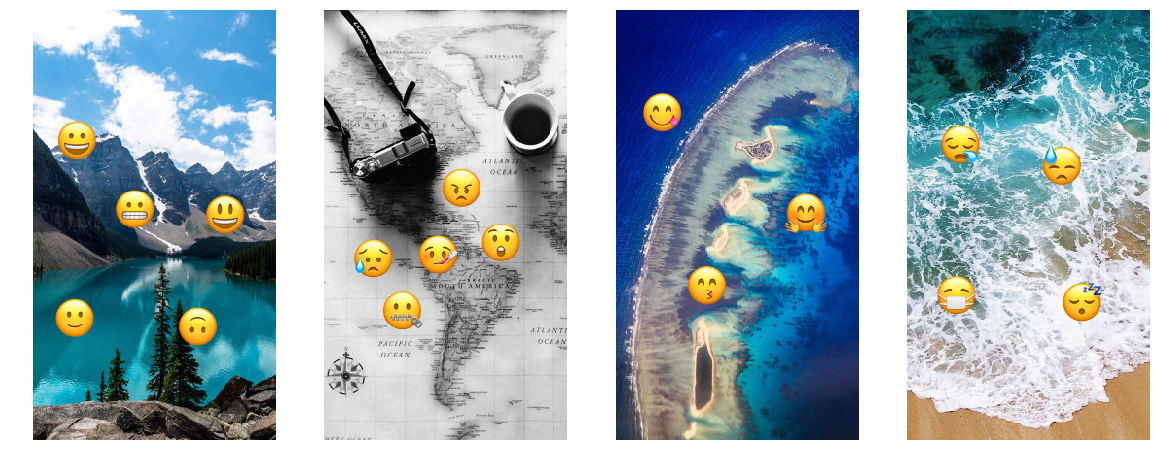

In [28]:
trainingData[0][0] = mpimg.imread(".\TrainingData\Color\CircleOne.png") 
trainingData[0][1] = mpimg.imread(".\TrainingData\Color\CircleTwo.png")
trainingData[0][2] = mpimg.imread(".\TrainingData\Color\HillOne.png")
trainingData[0][3] = mpimg.imread(".\TrainingData\Color\SquintOne.png")

PlotArrayOfImagesHorizontally(trainingData[0][0:4])

### Greyscale Conversions

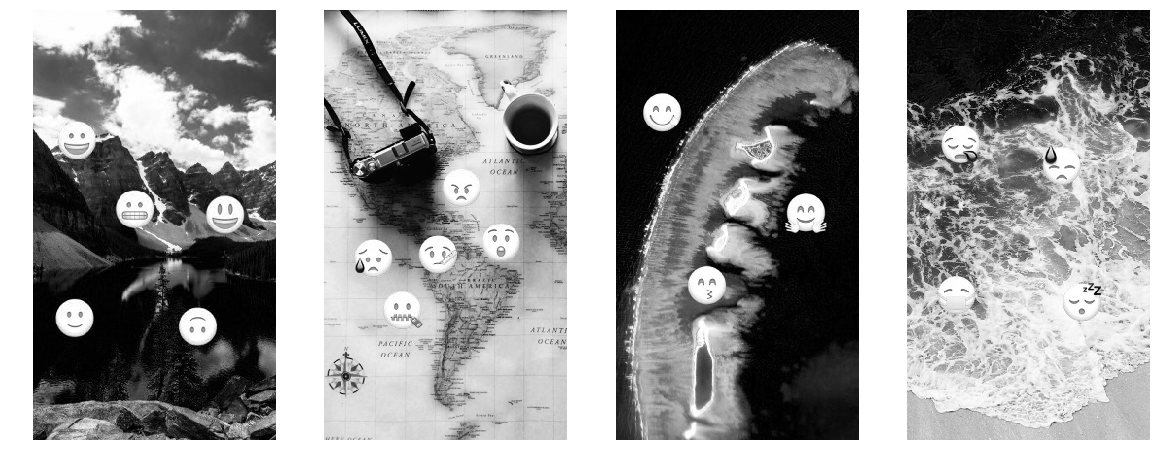

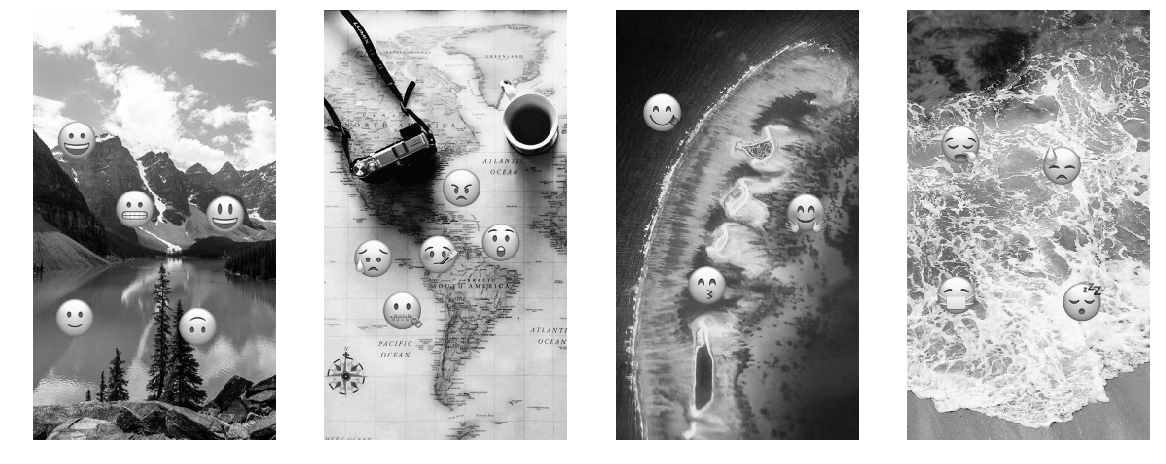

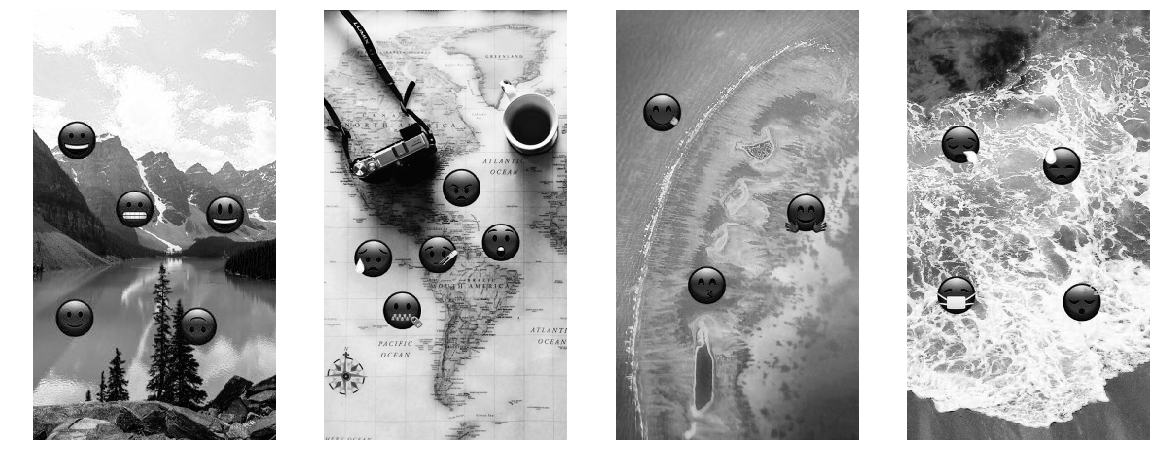

In [29]:
trainingData[1][0] = RedToGreyScale(trainingData[0][0])
trainingData[1][1] = RedToGreyScale(trainingData[0][1])
trainingData[1][2] = RedToGreyScale(trainingData[0][2])
trainingData[1][3] = RedToGreyScale(trainingData[0][3])

trainingData[2][0] = GreenToGreyScale(trainingData[0][0])
trainingData[2][1] = GreenToGreyScale(trainingData[0][1])
trainingData[2][2] = GreenToGreyScale(trainingData[0][2])
trainingData[2][3] = GreenToGreyScale(trainingData[0][3])

trainingData[3][0] = BlueToGreyScale(trainingData[0][0])
trainingData[3][1] = BlueToGreyScale(trainingData[0][1])
trainingData[3][2] = BlueToGreyScale(trainingData[0][2])
trainingData[3][3] = BlueToGreyScale(trainingData[0][3])

PlotArrayOfImagesHorizontally(trainingData[1][0:4])
PlotArrayOfImagesHorizontally(trainingData[2][0:4])
PlotArrayOfImagesHorizontally(trainingData[3][0:4])

### Binary Thresholding via Otsu's Method

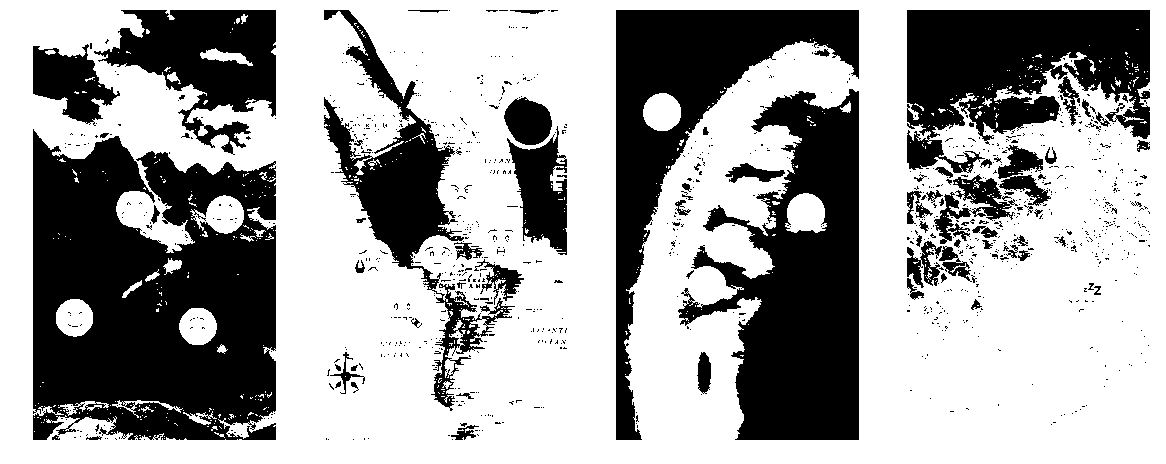

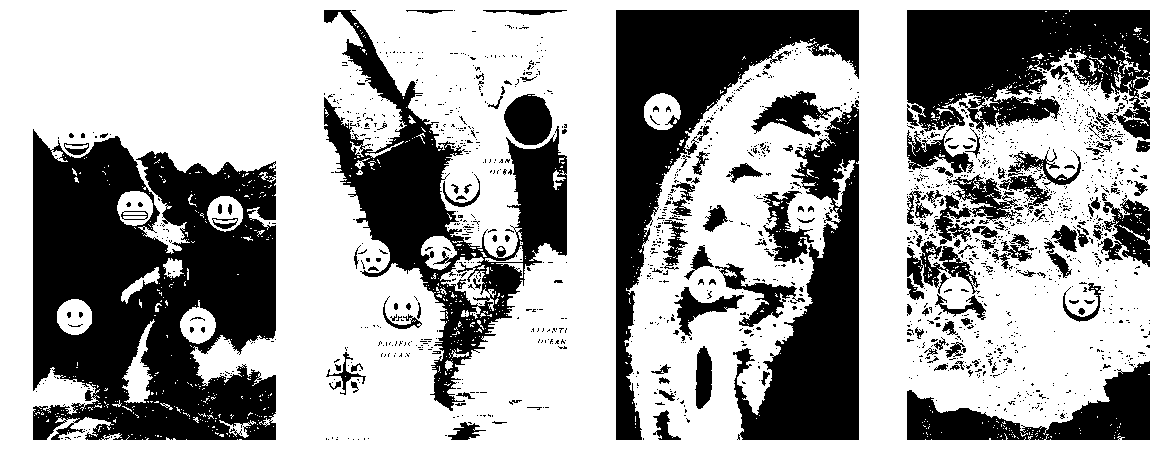

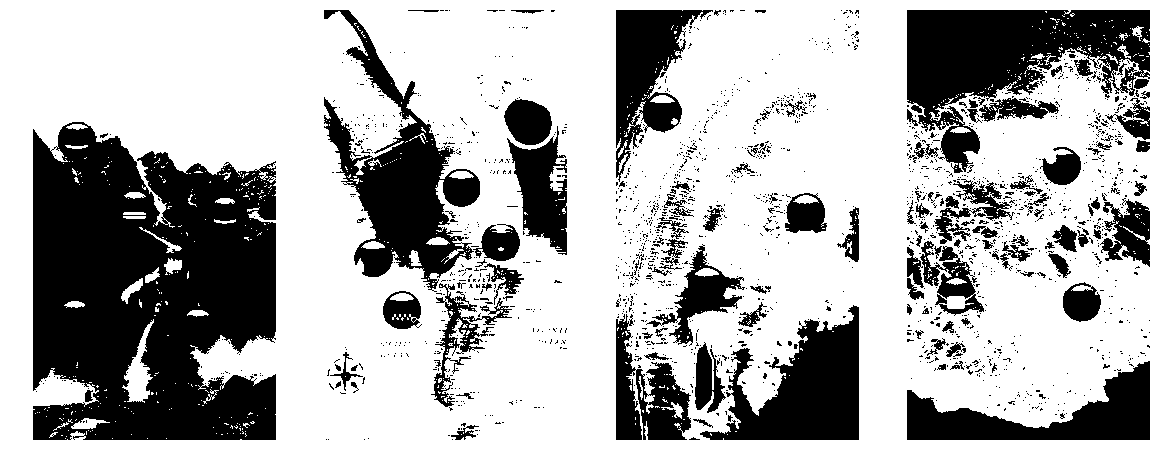

In [30]:
trainingData[4][0] = ThresholdImage(trainingData[1][0],0)
trainingData[4][1] = ThresholdImage(trainingData[1][1],0)
trainingData[4][2] = ThresholdImage(trainingData[1][2],0)
trainingData[4][3] = ThresholdImage(trainingData[1][3],0)

trainingData[5][0] = ThresholdImage(trainingData[2][0],0)
trainingData[5][1] = ThresholdImage(trainingData[2][1],20)
trainingData[5][2] = ThresholdImage(trainingData[2][2],0)
trainingData[5][3] = ThresholdImage(trainingData[2][3],0)

trainingData[6][0] = ThresholdImage(trainingData[3][0],0)
trainingData[6][1] = ThresholdImage(trainingData[3][1],0)
trainingData[6][2] = ThresholdImage(trainingData[3][2],0)
trainingData[6][3] = ThresholdImage(trainingData[3][3],0) 

PlotArrayOfImagesHorizontally(trainingData[4][0:4])
PlotArrayOfImagesHorizontally(trainingData[5][0:4])
PlotArrayOfImagesHorizontally(trainingData[6][0:4])

### Classification Lableing and Average Pixels Per Eye Calculation

Average Pixels Per Eye: 23.4 22.6 24.666666666666668 27.375


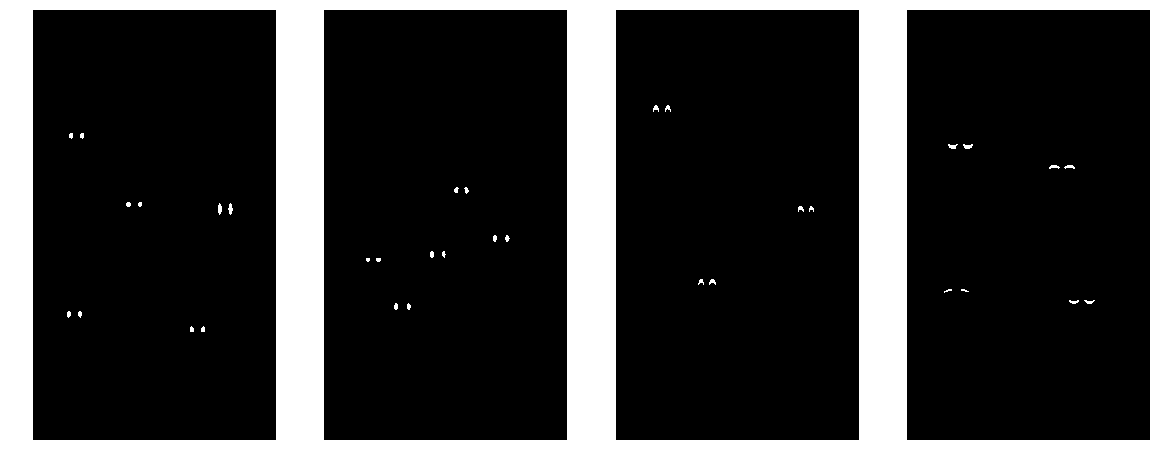

In [31]:
trainingData[7][0] = [None,None,None]
trainingData[7][1] = [None,None,None]
trainingData[7][2] = [None,None,None]
trainingData[7][3] = [None,None,None]

trainingData[7][0][0] = mpimg.imread(".\TrainingData\Classifications\CircleOneClassifications.png")
trainingData[7][1][0] = mpimg.imread(".\TrainingData\Classifications\CircleTwoClassifications.png")
trainingData[7][2][0] = mpimg.imread(".\TrainingData\Classifications\HillOneClassifications.png")
trainingData[7][3][0] = mpimg.imread(".\TrainingData\Classifications\SquintOneClassifications.png")

trainingData[7][0][1] = 10
trainingData[7][1][1] = 10
trainingData[7][2][1] = 6
trainingData[7][3][1] = 8

trainingData[7][0][2] = CalculateAveragePixelsPerEye(trainingData[7][0][0],trainingData[7][0][1],trainingData[0][0].shape[0],trainingData[0][0].shape[1])
trainingData[7][1][2] = CalculateAveragePixelsPerEye(trainingData[7][1][0],trainingData[7][1][1],trainingData[0][1].shape[0],trainingData[0][1].shape[1])
trainingData[7][2][2] = CalculateAveragePixelsPerEye(trainingData[7][2][0],trainingData[7][2][1],trainingData[0][2].shape[0],trainingData[0][2].shape[1])
trainingData[7][3][2] = CalculateAveragePixelsPerEye(trainingData[7][3][0],trainingData[7][3][1],trainingData[0][3].shape[0],trainingData[0][3].shape[1])

PlotArrayOfImagesHorizontally([trainingData[7][0][0],trainingData[7][1][0],trainingData[7][2][0],trainingData[7][3][0]])
print("Average Pixels Per Eye:",trainingData[7][0][2],trainingData[7][1][2],trainingData[7][2][2],trainingData[7][3][2])

### Construct and Balance Training Examples

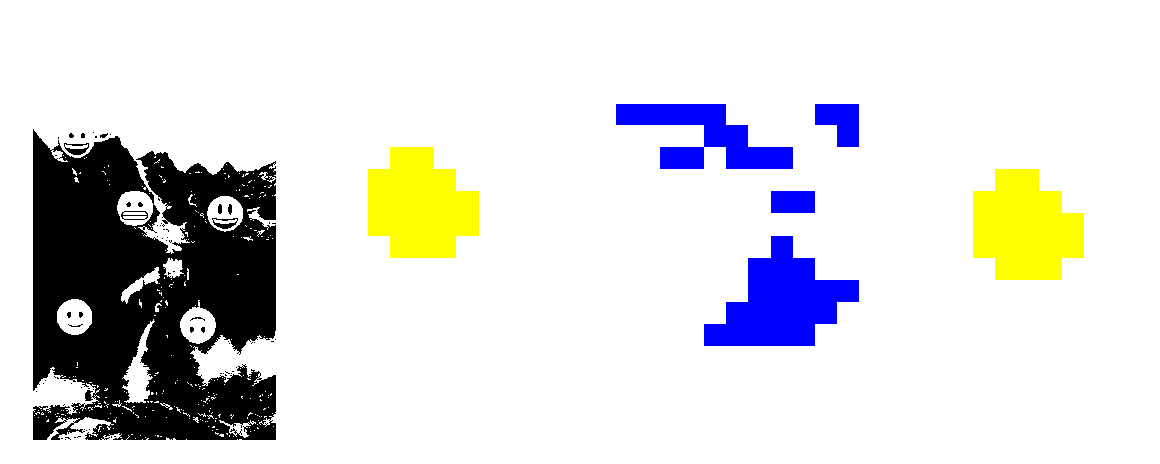

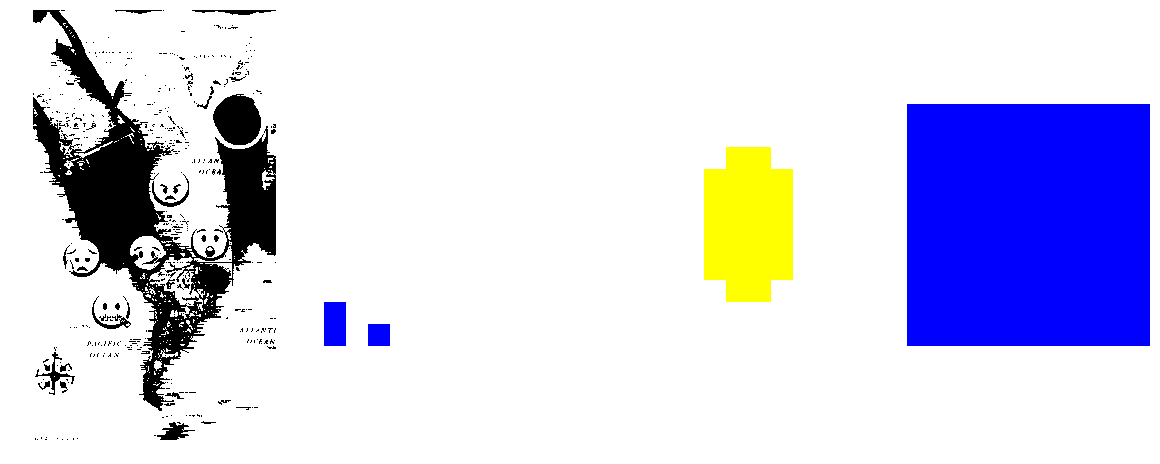

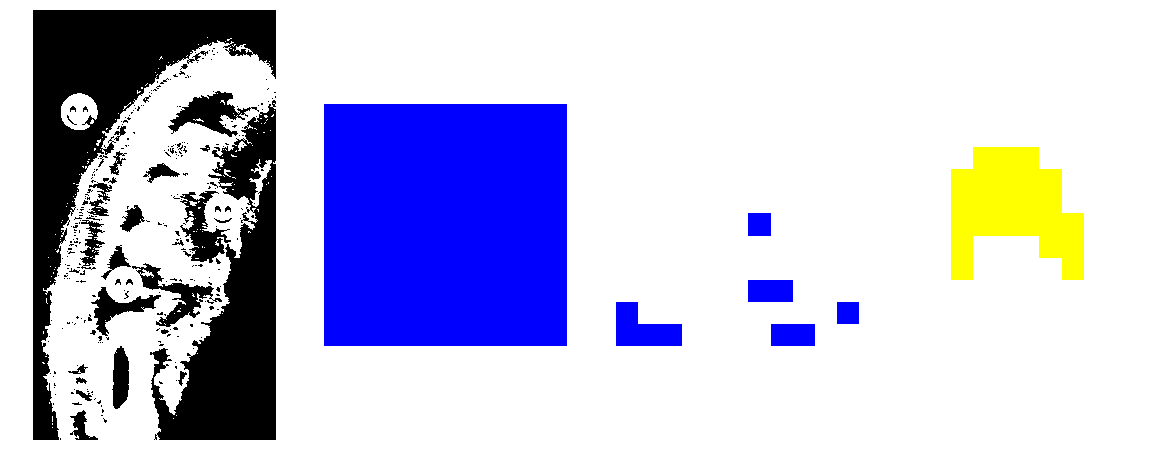

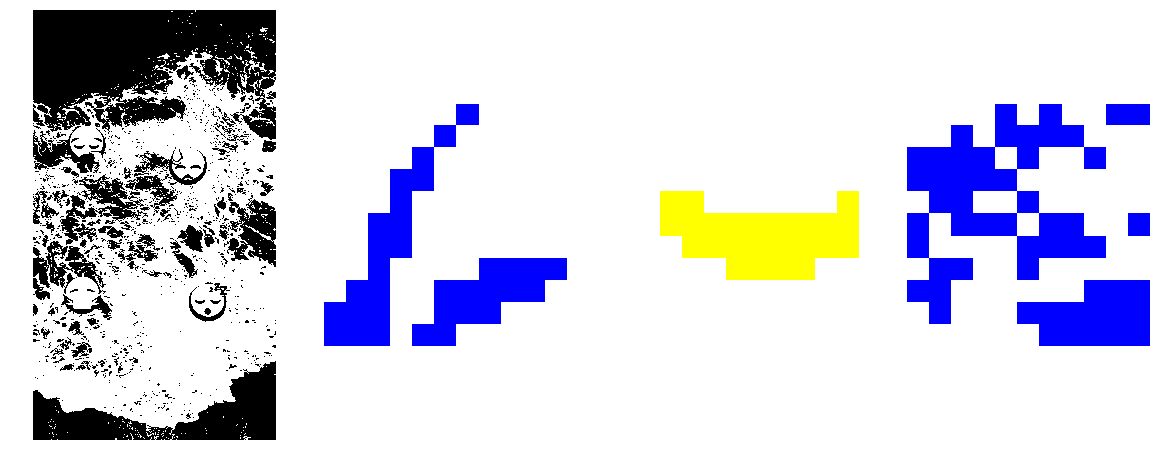

In [32]:
trainingData[8][0] = ConstructExamples(trainingData[5][0],trainingData[7][0][0],11)
trainingData[8][1] = ConstructExamples(trainingData[5][1],trainingData[7][1][0],11)
trainingData[8][2] = ConstructExamples(trainingData[5][2],trainingData[7][2][0],11)
trainingData[8][3] = ConstructExamples(trainingData[5][3],trainingData[7][3][0],11)

trainingData[9][0] = BalanceClasses(trainingData[8][0],24)
trainingData[9][1] = BalanceClasses(trainingData[8][1],24)
trainingData[9][2] = BalanceClasses(trainingData[8][2],9)
trainingData[9][3] = BalanceClasses(trainingData[8][3],25)

PlotArrayOfImagesHorizontally([trainingData[5][0],
                               TrainingExampleToImage(trainingData[8][0][CoordinatesToIndex(trainingData[8][0],[40,130])]),
                               TrainingExampleToImage(trainingData[8][0][CoordinatesToIndex(trainingData[8][0],[55,390])]),
                               TrainingExampleToImage(trainingData[8][0][CoordinatesToIndex(trainingData[8][0],[110,200])])])
PlotArrayOfImagesHorizontally([trainingData[5][1],
                               TrainingExampleToImage(trainingData[8][1][CoordinatesToIndex(trainingData[8][1],[30,100])]),
                               TrainingExampleToImage(trainingData[8][1][CoordinatesToIndex(trainingData[8][1],[73,305])]),
                               TrainingExampleToImage(trainingData[8][1][CoordinatesToIndex(trainingData[8][1],[110,200])])])
PlotArrayOfImagesHorizontally([trainingData[5][2],
                               TrainingExampleToImage(trainingData[8][2][CoordinatesToIndex(trainingData[8][2],[66,10])]),
                               TrainingExampleToImage(trainingData[8][2][CoordinatesToIndex(trainingData[8][2],[55,390])]),
                               TrainingExampleToImage(trainingData[8][2][CoordinatesToIndex(trainingData[8][2],[190,205])])])
PlotArrayOfImagesHorizontally([trainingData[5][3],
                               TrainingExampleToImage(trainingData[8][3][CoordinatesToIndex(trainingData[8][3],[40,130])]),
                               TrainingExampleToImage(trainingData[8][3][CoordinatesToIndex(trainingData[8][3],[170,300])]),
                               TrainingExampleToImage(trainingData[8][3][CoordinatesToIndex(trainingData[8][3],[110,200])])])

### Create Decision Tree

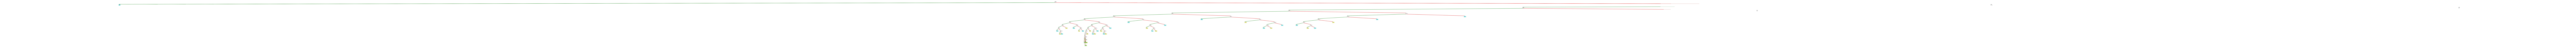

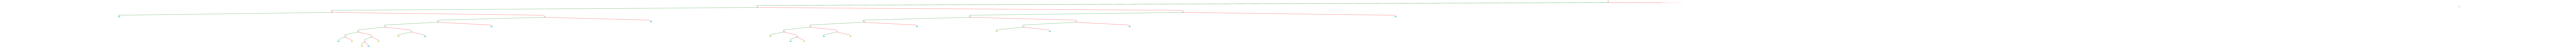

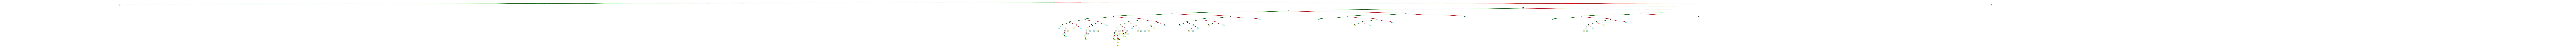

In [33]:
trainingData[10][0] = ID3(trainingData[9][0]+trainingData[9][1],0.98)
trainingData[10][2] = ID3(trainingData[9][2],0.98)
trainingData[10][3] = ID3(trainingData[9][3],0.98)

DrawTree(trainingData[10][0])
DrawTree(trainingData[10][2])
DrawTree(trainingData[10][3])

### Performance

Accuracy:                  0.997598016426 0.993239578491 0.984997288083 0.989152332249
Positive Predictive Value: 0.482926829268 0.238359201774 0.0852575488455 0.149961149961
Sensitivity:               0.846153846154 0.951327433628 0.972972972973 0.881278538813
Number of Emojis: [9 20 34 24]


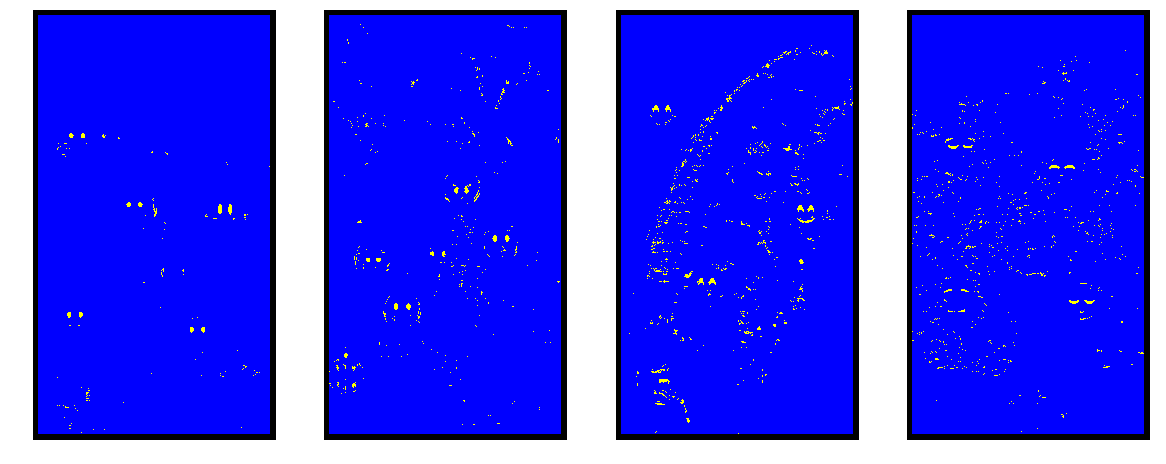

In [34]:
trainingData[11][0] = UseTree(trainingData[8][0],trainingData[10][0],trainingData[0][0].shape[0],trainingData[0][0].shape[1])
trainingData[11][1] = UseTree(trainingData[8][1],trainingData[10][0],trainingData[0][1].shape[0],trainingData[0][1].shape[1])
trainingData[11][2] = UseTree(trainingData[8][2],trainingData[10][2],trainingData[0][2].shape[0],trainingData[0][2].shape[1])
trainingData[11][3] = UseTree(trainingData[8][3],trainingData[10][3],trainingData[0][3].shape[0],trainingData[0][3].shape[1])

trainingData[12][0] = CalculateNumberOfEmojis(trainingData[11][0][1],trainingData[7][0][2],trainingData[0][0].shape[0],trainingData[0][0].shape[1])
trainingData[12][1] = CalculateNumberOfEmojis(trainingData[11][1][1],trainingData[7][1][2],trainingData[0][1].shape[0],trainingData[0][1].shape[1])
trainingData[12][2] = CalculateNumberOfEmojis(trainingData[11][2][1],trainingData[7][2][2],trainingData[0][2].shape[0],trainingData[0][2].shape[1])
trainingData[12][3] = CalculateNumberOfEmojis(trainingData[11][3][1],trainingData[7][3][2],trainingData[0][3].shape[0],trainingData[0][3].shape[1])

PlotArrayOfImagesHorizontally([trainingData[11][0][1],trainingData[11][1][1],trainingData[11][2][1],trainingData[11][3][1]])
print("Accuracy:                 ",trainingData[11][0][2],trainingData[11][1][2],trainingData[11][2][2],trainingData[11][3][2])
print("Positive Predictive Value:",trainingData[11][0][3],trainingData[11][1][3],trainingData[11][2][3],trainingData[11][3][3])
print("Sensitivity:              ",trainingData[11][0][4],trainingData[11][1][4],trainingData[11][2][4],trainingData[11][3][4])
print("Number of Emojis:",trainingData[12][0:4])

# Testing Data

In [35]:
# trainingData = [typeOfImage][imageNumber][x][y][rgb]
# type of image = color, redGreyScale, greenGreyScale, blueGreyScale, redBinary, greenBinary,
#                 blueBinary, [classificationImage, numberOfEyes, averagePixelsPerEye], TestingExample(), 
#                 BalancedClasses(), decisionTree (not used for testing data), 
#                 [confusionMatrix,predictedImage,Accuracy,PositivePredictiveValue,Sensitivity],
#                 numberOfEyes

testingData = np.empty((13,5),dtype=object)

### Color

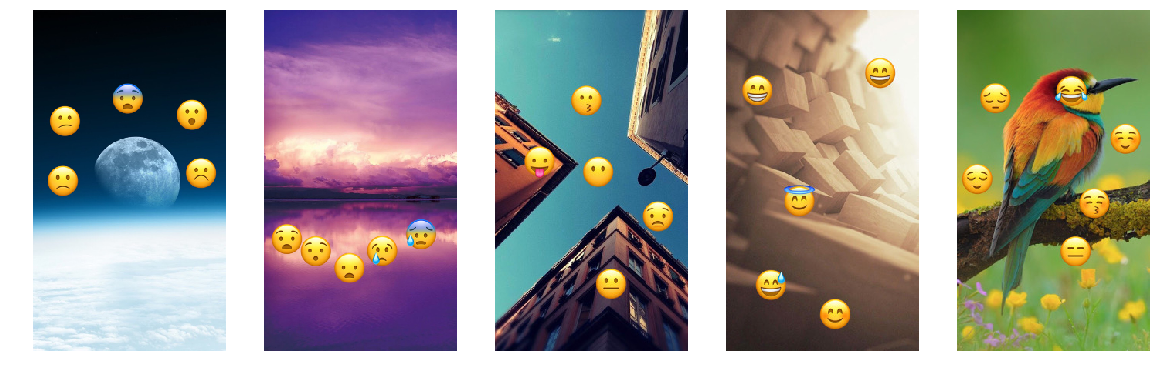

In [36]:
testingData[0][0] = mpimg.imread(".\TestingData\Color\CircleThree.png") 
testingData[0][1] = mpimg.imread(".\TestingData\Color\CircleFour.png")
testingData[0][2] = mpimg.imread(".\TestingData\Color\CircleFive.png") 
testingData[0][3] = mpimg.imread(".\TestingData\Color\HillTwo.png")
testingData[0][4] = mpimg.imread(".\TestingData\Color\SquintTwo.png") 

PlotArrayOfImagesHorizontally(testingData[0][0:5])

### Greyscale Conversions

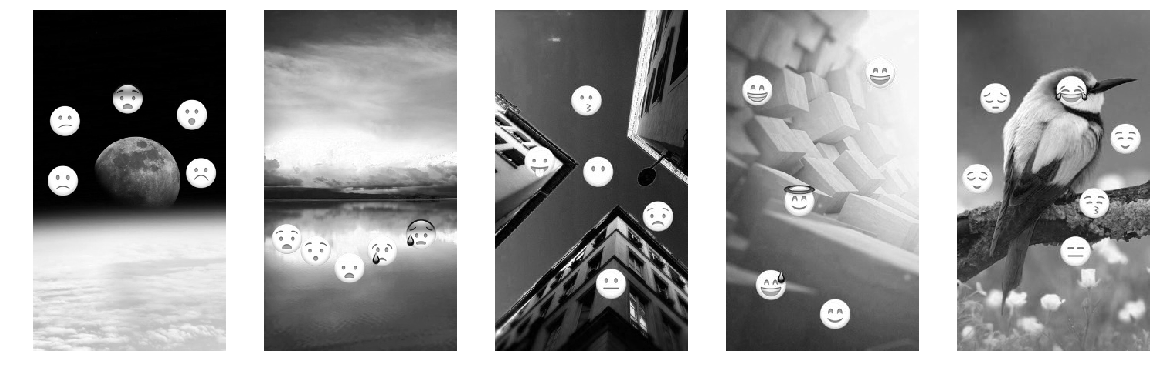

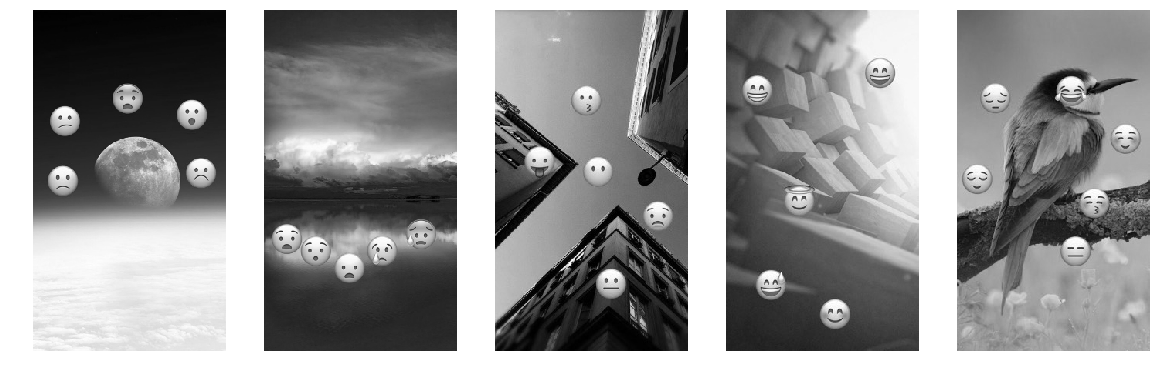

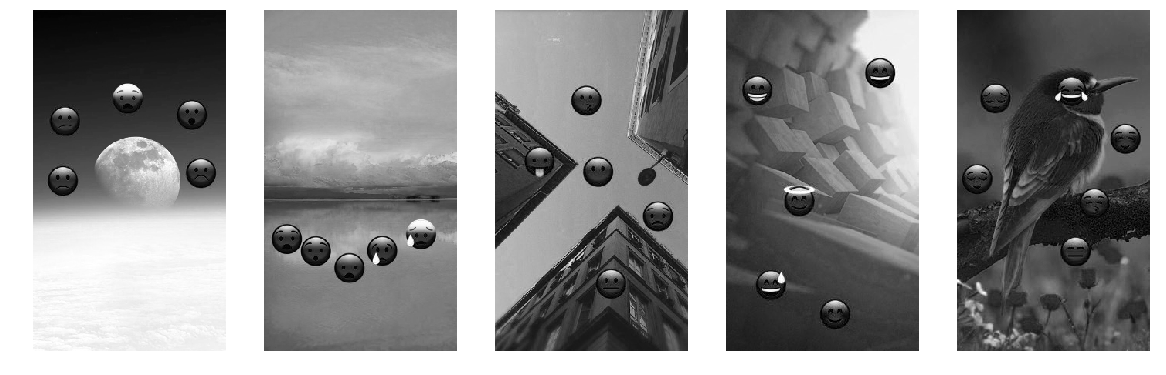

In [37]:
testingData[1][0] = RedToGreyScale(testingData[0][0])
testingData[1][1] = RedToGreyScale(testingData[0][1])
testingData[1][2] = RedToGreyScale(testingData[0][2])
testingData[1][3] = RedToGreyScale(testingData[0][3])
testingData[1][4] = RedToGreyScale(testingData[0][4])

testingData[2][0] = GreenToGreyScale(testingData[0][0])
testingData[2][1] = GreenToGreyScale(testingData[0][1])
testingData[2][2] = GreenToGreyScale(testingData[0][2])
testingData[2][3] = GreenToGreyScale(testingData[0][3])
testingData[2][4] = GreenToGreyScale(testingData[0][4])

testingData[3][0] = BlueToGreyScale(testingData[0][0])
testingData[3][1] = BlueToGreyScale(testingData[0][1])
testingData[3][2] = BlueToGreyScale(testingData[0][2])
testingData[3][3] = BlueToGreyScale(testingData[0][3])
testingData[3][4] = BlueToGreyScale(testingData[0][4])

PlotArrayOfImagesHorizontally(testingData[1][0:5])
PlotArrayOfImagesHorizontally(testingData[2][0:5])
PlotArrayOfImagesHorizontally(testingData[3][0:5])

### Binary Thresholding via Otsu's Method

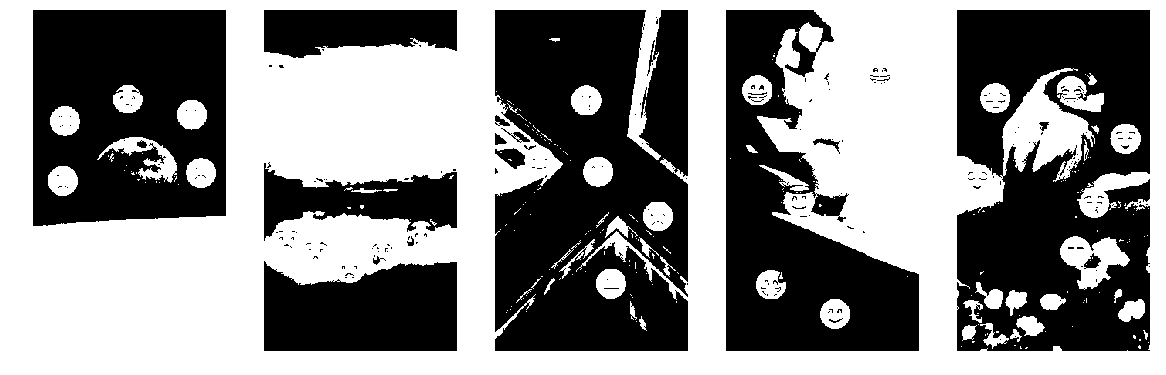

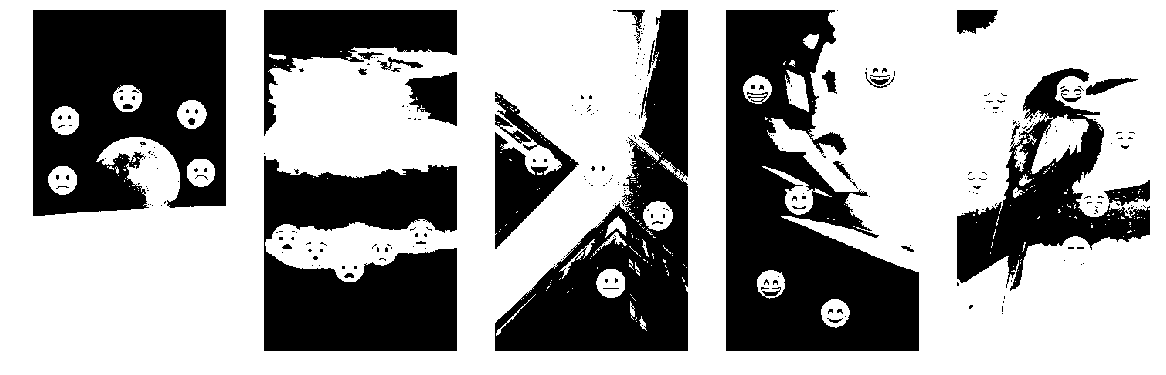

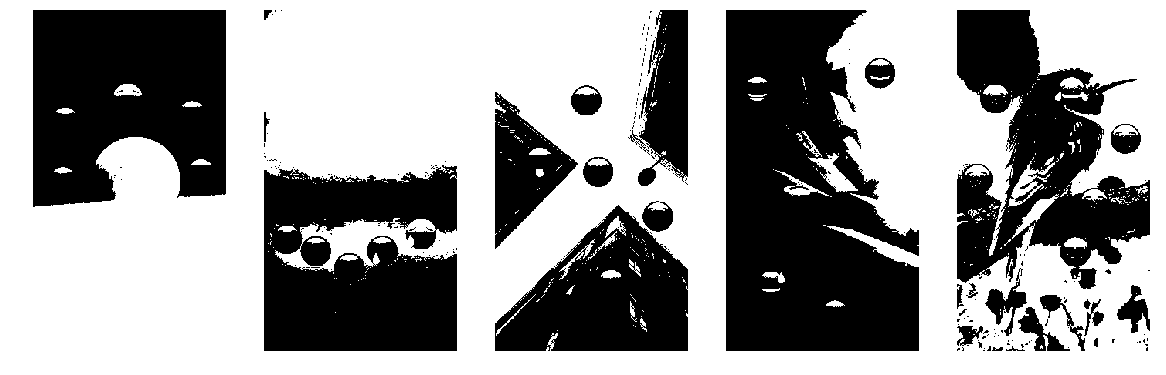

In [38]:
testingData[4][0] = ThresholdImage(testingData[1][0],0)
testingData[4][1] = ThresholdImage(testingData[1][1],0)
testingData[4][2] = ThresholdImage(testingData[1][2],0)
testingData[4][3] = ThresholdImage(testingData[1][3],0)
testingData[4][4] = ThresholdImage(testingData[1][4],0)

testingData[5][0] = ThresholdImage(testingData[2][0],0)
testingData[5][1] = ThresholdImage(testingData[2][1],0)
testingData[5][2] = ThresholdImage(testingData[2][2],20)
testingData[5][3] = ThresholdImage(testingData[2][3],0)
testingData[5][4] = ThresholdImage(testingData[2][4],0)

testingData[6][0] = ThresholdImage(testingData[3][0],0)
testingData[6][1] = ThresholdImage(testingData[3][1],0)
testingData[6][2] = ThresholdImage(testingData[3][2],0)
testingData[6][3] = ThresholdImage(testingData[3][3],0)
testingData[6][4] = ThresholdImage(testingData[3][4],0)

PlotArrayOfImagesHorizontally(testingData[4][0:5])
PlotArrayOfImagesHorizontally(testingData[5][0:5])
PlotArrayOfImagesHorizontally(testingData[6][0:5])

### Classification Lableing and Average Pixels Per Eye Calculation

Average Pixels Per Eye: 18.3 16.5 18.0 27.0 17.666666666666668


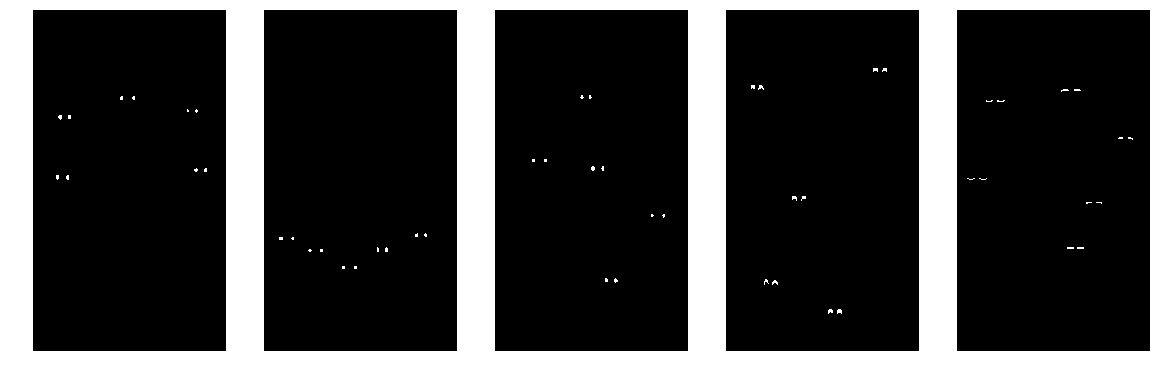

In [39]:
# labels for testing data
testingData[7][0] = [None,None,None]
testingData[7][1] = [None,None,None]
testingData[7][2] = [None,None,None]
testingData[7][3] = [None,None,None]
testingData[7][4] = [None,None,None]

testingData[7][0][0] = mpimg.imread(".\TestingData\Classifications\CircleThreeClassifications.png")
testingData[7][1][0] = mpimg.imread(".\TestingData\Classifications\CircleFourClassifications.png")
testingData[7][2][0] = mpimg.imread(".\TestingData\Classifications\CircleFiveClassifications.png")
testingData[7][3][0] = mpimg.imread(".\TestingData\Classifications\HillTwoClassifications.png")
testingData[7][4][0] = mpimg.imread(".\TestingData\Classifications\SquintTwoClassifications.png")

# number of eyes in each image
testingData[7][0][1] = 10
testingData[7][1][1] = 10
testingData[7][2][1] = 10
testingData[7][3][1] = 10
testingData[7][4][1] = 12

testingData[7][0][2] = CalculateAveragePixelsPerEye(testingData[7][0][0],testingData[7][0][1],testingData[0][0].shape[0],testingData[0][0].shape[1])
testingData[7][1][2] = CalculateAveragePixelsPerEye(testingData[7][1][0],testingData[7][1][1],testingData[0][1].shape[0],testingData[0][1].shape[1])
testingData[7][2][2] = CalculateAveragePixelsPerEye(testingData[7][2][0],testingData[7][2][1],testingData[0][2].shape[0],testingData[0][2].shape[1])
testingData[7][3][2] = CalculateAveragePixelsPerEye(testingData[7][3][0],testingData[7][3][1],testingData[0][3].shape[0],testingData[0][3].shape[1])
testingData[7][4][2] = CalculateAveragePixelsPerEye(testingData[7][4][0],testingData[7][4][1],testingData[0][4].shape[0],testingData[0][4].shape[1])

PlotArrayOfImagesHorizontally([testingData[7][0][0],testingData[7][1][0],testingData[7][2][0],testingData[7][3][0],testingData[7][4][0]])
print("Average Pixels Per Eye:",testingData[7][0][2],testingData[7][1][2],testingData[7][2][2],testingData[7][3][2],testingData[7][4][2])

### Construct and Balance Training Examples

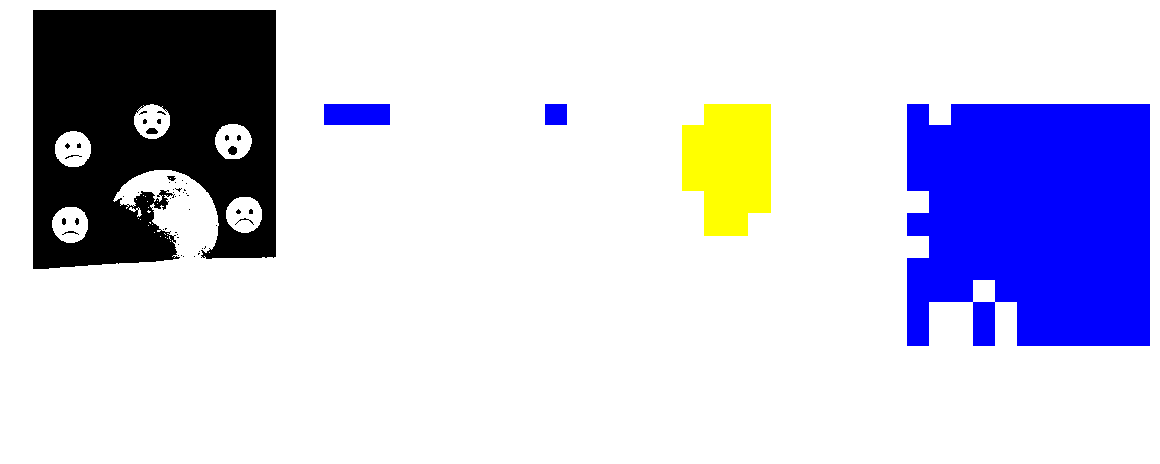

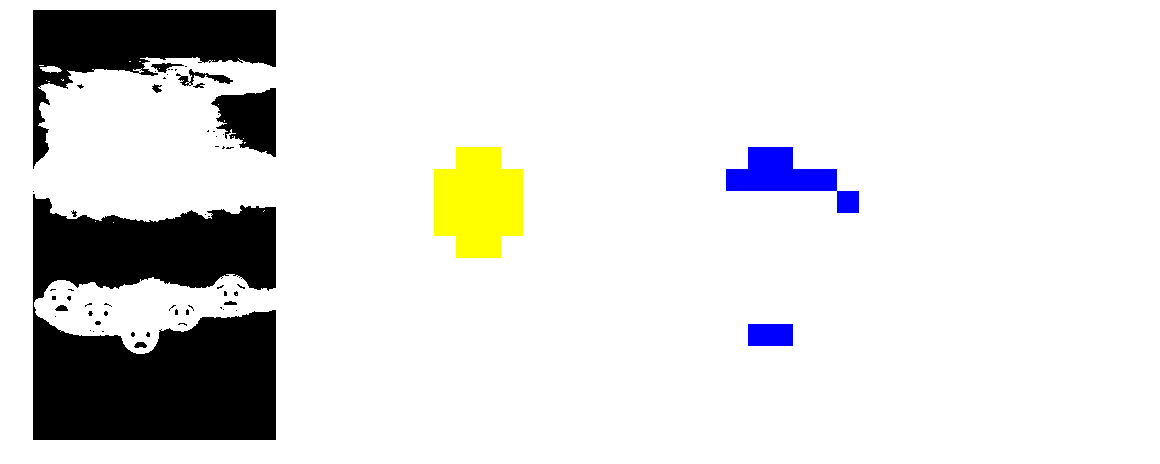

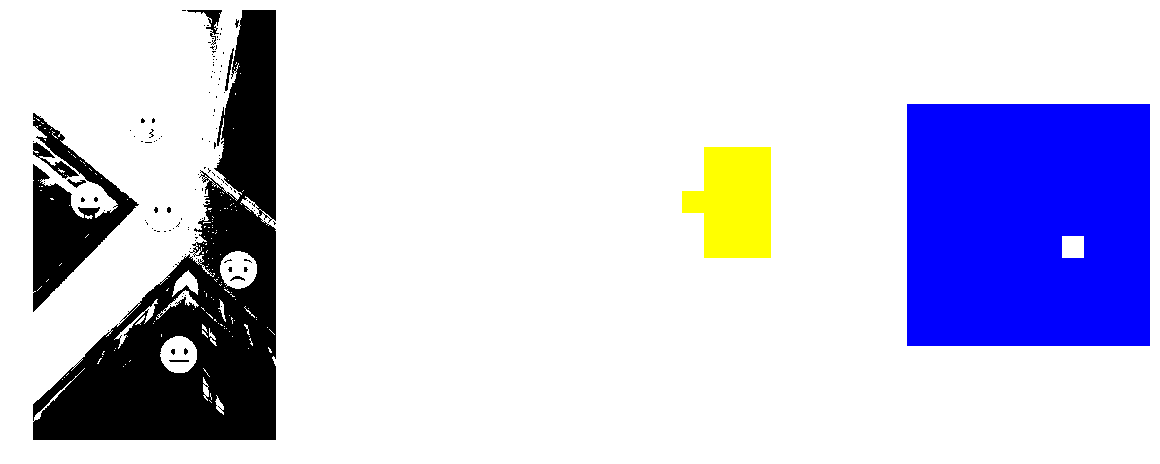

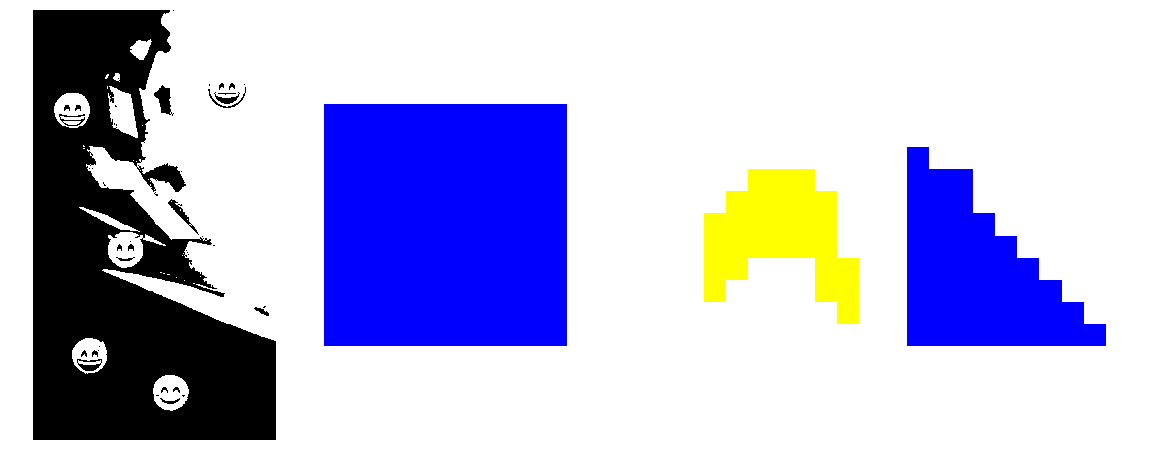

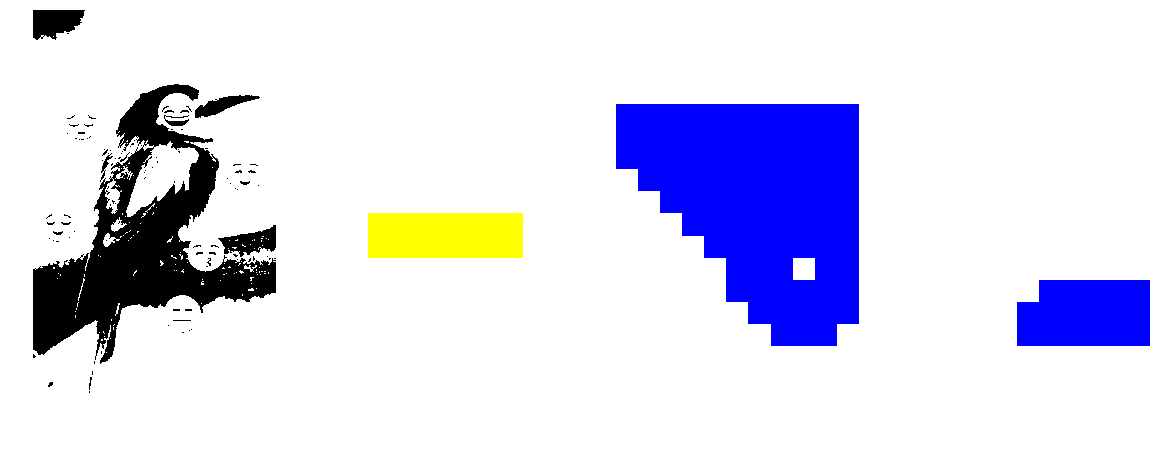

In [40]:
testingData[8][0] = ConstructExamples(testingData[5][0],testingData[7][0][0],11)
testingData[8][1] = ConstructExamples(testingData[5][1],testingData[7][1][0],11)
testingData[8][2] = ConstructExamples(testingData[5][2],testingData[7][2][0],11)
testingData[8][3] = ConstructExamples(testingData[5][3],testingData[7][3][0],11)
testingData[8][4] = ConstructExamples(testingData[5][4],testingData[7][4][0],11)

testingData[9][0] = BalanceClasses(testingData[8][0],1)
testingData[9][1] = BalanceClasses(testingData[8][1],1)
testingData[9][2] = BalanceClasses(testingData[8][2],1)
testingData[9][3] = BalanceClasses(testingData[8][3],1)
testingData[9][4] = BalanceClasses(testingData[8][4],1)

PlotArrayOfImagesHorizontally([testingData[5][0],
                               TrainingExampleToImage(testingData[8][0][CoordinatesToIndex(testingData[8][0],[40,130])]),
                               TrainingExampleToImage(testingData[8][0][CoordinatesToIndex(testingData[8][0],[45,220])]),
                               TrainingExampleToImage(testingData[8][0][CoordinatesToIndex(testingData[8][0],[110,200])])])
PlotArrayOfImagesHorizontally([testingData[5][1],
                               TrainingExampleToImage(testingData[8][1][CoordinatesToIndex(testingData[8][1],[101,335])]),
                               TrainingExampleToImage(testingData[8][1][CoordinatesToIndex(testingData[8][1],[73,305])]),
                               TrainingExampleToImage(testingData[8][1][CoordinatesToIndex(testingData[8][1],[110,200])])])
PlotArrayOfImagesHorizontally([testingData[5][2],
                               TrainingExampleToImage(testingData[8][2][CoordinatesToIndex(testingData[8][2],[66,10])]),
                               TrainingExampleToImage(testingData[8][2][CoordinatesToIndex(testingData[8][2],[203,268])]),
                               TrainingExampleToImage(testingData[8][2][CoordinatesToIndex(testingData[8][2],[190,205])])])
PlotArrayOfImagesHorizontally([testingData[5][3],
                               TrainingExampleToImage(testingData[8][3][CoordinatesToIndex(testingData[8][3],[40,130])]),
                               TrainingExampleToImage(testingData[8][3][CoordinatesToIndex(testingData[8][3],[145,390])]),
                               TrainingExampleToImage(testingData[8][3][CoordinatesToIndex(testingData[8][3],[110,200])])])
PlotArrayOfImagesHorizontally([testingData[5][4],
                               TrainingExampleToImage(testingData[8][4][CoordinatesToIndex(testingData[8][4],[147,308])]),
                               TrainingExampleToImage(testingData[8][4][CoordinatesToIndex(testingData[8][4],[170,300])]),
                               TrainingExampleToImage(testingData[8][4][CoordinatesToIndex(testingData[8][4],[110,200])])])

### Performance

Accuracy:                  0.999070199907 0.998702154037 0.99823725399 0.995196032853 0.996290485046
Positive Predictive Value: 0.669260700389 0.557620817844 0.496666666667 0.332840236686 0.317697228145
Sensitivity:               0.939890710383 0.909090909091 0.827777777778 0.833333333333 0.702830188679
Number of Emojis: [7 8 8 13 13]


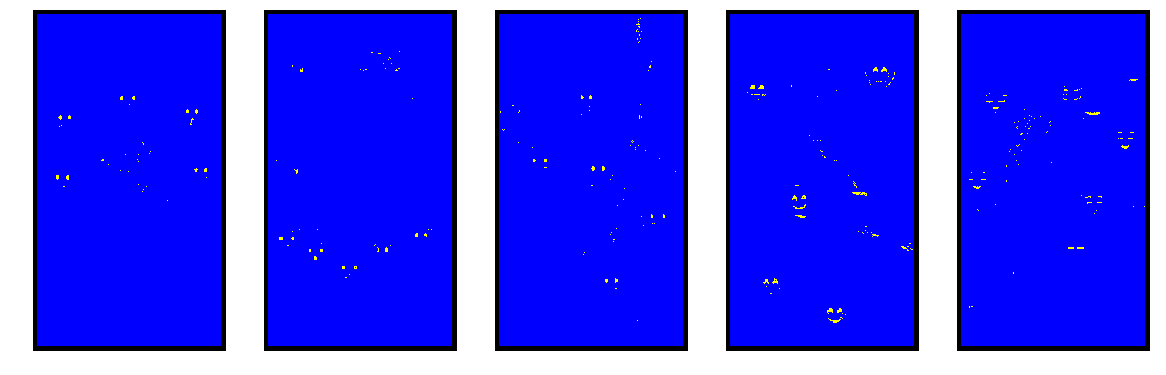

In [41]:
testingData[11][0] = UseTree(testingData[8][0],trainingData[10][0],testingData[0][0].shape[0],testingData[0][0].shape[1])
testingData[11][1] = UseTree(testingData[8][1],trainingData[10][0],testingData[0][1].shape[0],testingData[0][1].shape[1])
testingData[11][2] = UseTree(testingData[8][2],trainingData[10][0],testingData[0][2].shape[0],testingData[0][2].shape[1])
testingData[11][3] = UseTree(testingData[8][3],trainingData[10][2],testingData[0][3].shape[0],testingData[0][3].shape[1])
testingData[11][4] = UseTree(testingData[8][4],trainingData[10][3],testingData[0][4].shape[0],testingData[0][4].shape[1])

testingData[12][0] = CalculateNumberOfEmojis(testingData[11][0][1],testingData[7][0][2],testingData[0][0].shape[0],testingData[0][0].shape[1])
testingData[12][1] = CalculateNumberOfEmojis(testingData[11][1][1],testingData[7][1][2],testingData[0][1].shape[0],testingData[0][1].shape[1])
testingData[12][2] = CalculateNumberOfEmojis(testingData[11][2][1],testingData[7][2][2],testingData[0][2].shape[0],testingData[0][2].shape[1])
testingData[12][3] = CalculateNumberOfEmojis(testingData[11][3][1],testingData[7][3][2],testingData[0][3].shape[0],testingData[0][3].shape[1])
testingData[12][4] = CalculateNumberOfEmojis(testingData[11][4][1],testingData[7][4][2],testingData[0][4].shape[0],testingData[0][4].shape[1])

PlotArrayOfImagesHorizontally([testingData[11][0][1],testingData[11][1][1],testingData[11][2][1],testingData[11][3][1],testingData[11][4][1]])
print("Accuracy:                 ",testingData[11][0][2],testingData[11][1][2],testingData[11][2][2],testingData[11][3][2],testingData[11][4][2])
print("Positive Predictive Value:",testingData[11][0][3],testingData[11][1][3],testingData[11][2][3],testingData[11][3][3],testingData[11][4][3])
print("Sensitivity:              ",testingData[11][0][4],testingData[11][1][4],testingData[11][2][4],testingData[11][3][4],testingData[11][4][4])
print("Number of Emojis:",testingData[12][0:5])